In [26]:
import pandas as pd
from matplotlib.ticker import ScalarFormatter
import numpy as np
import matplotlib.pyplot as plt

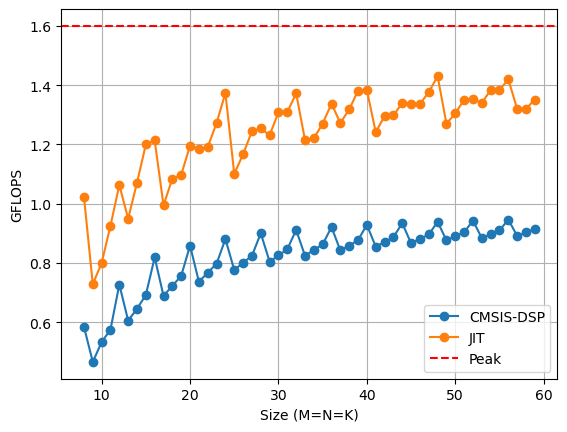

In [27]:
data = pd.read_csv('gemm_square_test1.csv', sep=";")
data
#plt.figure(figsize=(10, 6))
for type_exec in data['Type'].unique():
    subset = data[data['Type'] == type_exec]
    plt.plot(subset['K'], subset['GFLOPS'], label=type_exec, marker='o')

plt.axhline(y=1.6, color='r', linestyle='--', label='Peak')
plt.xlabel('Size (M=N=K)')
plt.ylabel('GFLOPS')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/c0/3zmp_qkd1q96kl5cw3f5lyt80000gn/T/ipykernel_92107/634558097.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Peak'] = (subset['GFLOPS'] / 1.6) * 100
/var/folders/c0/3zmp_qkd1q96kl5cw3f5lyt80000gn/T/ipykernel_92107/634558097.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Peak'] = (subset['GFLOPS'] / 1.6) * 100


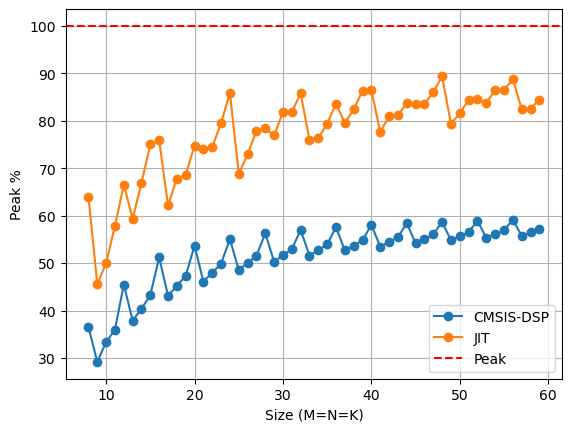

In [28]:
# Calculate percentage of peak performance
for type_exec in data['Type'].unique():
    subset = data[data['Type'] == type_exec]
    subset['Peak'] = (subset['GFLOPS'] / 1.6) * 100
    plt.plot(subset['K'], subset['Peak'], label=type_exec, marker='o')

plt.axhline(y=100, color='r', linestyle='--', label='Peak')
plt.xlabel('Size (M=N=K)')
plt.ylabel('Peak %')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
# Filter data for JIT and CMSIS-DSP
jit_data = data[data['Type'] == 'JIT']
cmsis_data = data[data['Type'] == 'CMSIS-DSP']

# Ensure both subsets are aligned by index
aligned_data = pd.merge(jit_data, cmsis_data, on=['M', 'K', 'N'], suffixes=('_jit', '_cmsis'))

# Calculate speedup
aligned_data['Speedup'] = aligned_data['GFLOPS_jit'] / aligned_data['GFLOPS_cmsis']

# Calculate average speedup
average_speedup = aligned_data['Speedup'].mean()
print(f"Average Speedup of JIT over CMSIS-DSP: {average_speedup}")

Average Speedup of JIT over CMSIS-DSP: 1.511849114815639


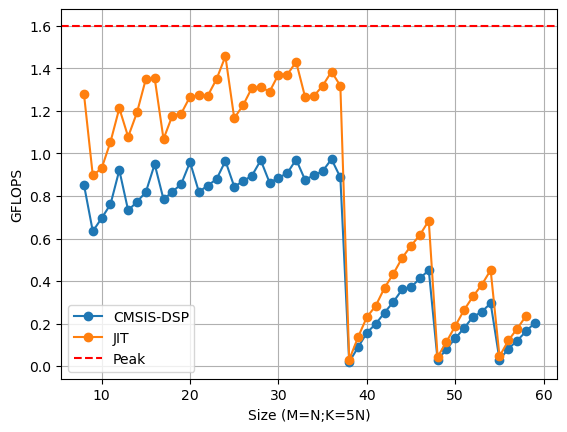

In [30]:
data = pd.read_csv('gemm_square_test2.csv', sep=";")
data
#plt.figure(figsize=(10, 6))
for type_exec in data['Type'].unique():
    subset = data[data['Type'] == type_exec]
    plt.plot(subset['M'], subset['GFLOPS'], label=type_exec, marker='o')

plt.axhline(y=1.6, color='r', linestyle='--', label='Peak')
plt.xlabel('Size (M=N;K=5N)')
plt.ylabel('GFLOPS')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/c0/3zmp_qkd1q96kl5cw3f5lyt80000gn/T/ipykernel_92107/4103073457.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Peak'] = (subset['GFLOPS'] / 1.6) * 100
/var/folders/c0/3zmp_qkd1q96kl5cw3f5lyt80000gn/T/ipykernel_92107/4103073457.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Peak'] = (subset['GFLOPS'] / 1.6) * 100


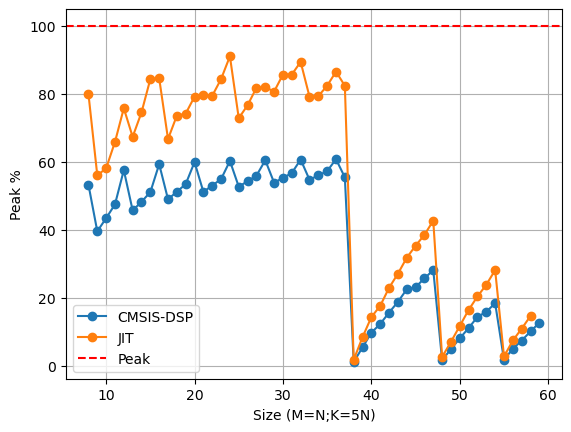

In [31]:
# Calculate percentage of peak performance
for type_exec in data['Type'].unique():
    subset = data[data['Type'] == type_exec]
    subset['Peak'] = (subset['GFLOPS'] / 1.6) * 100
    plt.plot(subset['M'], subset['Peak'], label=type_exec, marker='o')

plt.axhline(y=100, color='r', linestyle='--', label='Peak')
plt.xlabel('Size (M=N;K=5N)')
plt.ylabel('Peak %')
plt.legend()
plt.grid(True)
plt.show()